In [29]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

q_table = np.load('infinite_q_table.npy')
q_table_no_ace = np.zeros([19,2])
q_table_ace = np.zeros([19,2])


for index_s, state in enumerate(q_table): 
    for index_a, ace in enumerate(state): 
        if index_a == 1: 
            q_table_ace[index_s][0] = ace[0]
            q_table_ace[index_s][1] = ace[1]
            
        else: 
            q_table_no_ace[index_s][0] = ace[0]
            q_table_no_ace[index_s][1] = ace[1]


q_table_no_ace_df = pd.DataFrame(q_table_no_ace, columns=['stick NA', 'hit NA'], index=np.arange(2,21))
q_table_ace_df = pd.DataFrame(q_table_ace, columns=['stick A', 'hit A'], index=np.arange(2,21))

q_table = pd.concat([q_table_no_ace_df, q_table_ace_df], axis=1)
q_table

,stick NA,hit NA,stick A,hit A
2,4.0,488.772209,0.000000,0.000000
3,9.0,484.549357,0.000000,0.000000
4,16.0,466.785116,0.000000,0.000000
5,25.0,470.131039,0.000000,0.000000
6,36.0,463.985969,0.000000,0.000000
7,49.0,453.017641,0.000000,0.000000
8,64.0,447.891902,0.000000,0.000000
9,81.0,447.007532,0.000000,0.000000
10,100.0,432.750102,0.000000,0.000000
11,121.0,436.016189,121.000000,542.718873


In [28]:
track = np.load('trackerson_the_2nd.npy')
print(track.shape)

tracker_infinite = np.zeros([19,2])

for index_s, state in enumerate(track): 
    for index_p, ace in enumerate(state): 
            tracker_infinite[index_s][index_p] = ace
            

            
        
tracker_infinite_df = pd.DataFrame(tracker_infinite, columns=['no ace', 'ace'], index=np.arange(2,21))
tracker_infinite_df

(19, 2)


,no ace,ace
2,1964.0,0.0
3,1902.0,0.0
4,2010.0,0.0
5,2116.0,0.0
6,2321.0,0.0
7,2347.0,0.0
8,2614.0,0.0
9,2665.0,0.0
10,8472.0,0.0
11,1030.0,1960.0


In [27]:
q_policy = np.load('infinite_policy.npy')
print(q_policy.shape)
policy_df = pd.DataFrame(q_policy, columns=['No Ace', 'Ace'], index=np.arange(2,21))
policy_df

(19, 2)


,No Ace,Ace
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0
10,1.0,0.0
11,1.0,1.0


In [15]:
dict = {1:10, 2:10, 3:10.5555}

print(sum(list(dict.values())[1-1:]))

30.555500000000002


(19, 10, 2)


<AxesSubplot: >

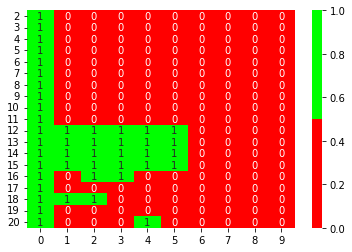

In [88]:
import seaborn as sns
from matplotlib.colors import ListedColormap 
q_policy = np.load('finite_policy.npy')
print(q_policy.shape)

q_policy_noace = np.zeros([19,10])

for index_s, state in enumerate(q_policy): 
    for index_p, percentage in enumerate(state): 

        q_policy_noace[index_s][index_p] = percentage[0]

            
        
policy_df = pd.DataFrame(q_policy_noace, columns=np.arange(0,10), index=np.arange(2,21))
#policy_df
sns.heatmap(policy_df, annot=True, cmap=ListedColormap(['#ff0000', '#00FF00']))

In [90]:
mux = pd.MultiIndex.from_product([[0,1,2,3,4,5,6,7,8,9], ['Hit', 'Stick']])

q_finite_values = np.load('finite_q_table.npy')


q_finite_no_ace = np.zeros([19,20])
q_finite_ace = np.zeros([19,20])


for index_s, state in enumerate(q_finite_values): #19
    
    for index_p, percentage in enumerate(state): #10

        i_1 = 0
        i_2 = 0 
        for index_a, ace in enumerate(state): # 2

            if index_a == 1: 
                
                q_finite_ace[index_s][i_1] = ace[1][0]
                i_1 += 1
                q_finite_ace[index_s][i_1] = ace[1][1]
                i_1 += 1
            else: 
                q_finite_no_ace[index_s][i_2] = ace[0][0]
                i_2 += 1 
                q_finite_no_ace[index_s][i_2] = ace[0][1]
                i_2 += 1
          
print(q_finite_no_ace.shape)


# q_table_no_ace_df = pd.DataFrame(q_table_no_ace, columns=mux, index=np.arange(2,21))
# q_table_ace_df = pd.DataFrame(q_table_ace, columns=mux, index=np.arange(2,21))

# q_table = pd.concat([q_table_no_ace_df, q_table_ace_df], axis=1)

# Create a MultiIndex for the columns
columns = pd.MultiIndex.from_product([range(10), ['stick', 'hit']],
                                     names=['%', 'action'])

# Reshape the numpy array into 19 rows and 20 columns (10 columns * 2 subcolumns)
#reshaped_data = q_finite_no_ace.reshape((19,20))


# Create the DataFrame
df = pd.DataFrame(q_finite_no_ace, columns=columns, index=np.arange(2,21))
df

(19, 20)


%                0                        1                       2  \
action       stick          hit       stick         hit       stick   
2         4.000000  1132.852360    0.000000    0.000000    0.000000   
3         9.000000  1139.480372    0.000000    0.000000    0.000000   
4        16.000000  1140.652153    0.000000    0.000000    0.000000   
5        25.000000  1137.440263    0.000000    0.000000    0.000000   
6        36.000000  1135.434517    0.000000    0.000000    0.000000   
7        49.000000  1129.905859    0.000000    0.000000    0.000000   
8        64.000000  1106.183927    0.000000    0.000000    0.000000   
9        81.000000  1066.172390    0.000000    0.000000    0.000000   
10      100.000000   980.978029    0.000000    0.000000    0.000000   
11      121.000000   913.441347    0.000000    0.000000    0.000000   
12      144.000000   991.608188  144.000000  380.662042  144.000000   
13      169.000000   977.491125  169.000000  358.681635  169.000000   
14      196.000000   960.053867  196.000000  367.588287  196.000000   
15      225.000000   901.606038  225.000000  390.510821  225.000000   
16      256.000000   932.926530  256.000000  376.278877  256.000000   
17      289.000000   857.161840  289.000000  177.113296  289.000000   
18      324.000000   775.512660  114.371406  336.616614  324.000000   
19      360.998802   644.123465  358.725002    7.239484  360.999103   
20      399.999998   440.999591   15.485397    0.000000  390.481948   

%                            3                  4                  5  \
action         hit       stick         hit  stick         hit  stick   
2         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
3         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
4         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
5         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
6         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
7         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
8         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
9         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
10        0.000000    0.000000    0.000000    0.0    0.000000    0.0   
11        0.000000    0.000000    0.000000    0.0    0.000000    0.0   
12      332.459867  144.000000  292.400804  144.0  252.245976  144.0   
13      284.887143  169.000000  320.864127  169.0  289.280110  169.0   
14      378.005775  196.000000  294.100053  196.0  266.249293  196.0   
15      319.131956  225.000000  283.208666  225.0  266.033499  225.0   
16      334.542494  256.000000  246.461000  256.0  220.163816  256.0   
17      287.340047  289.000000  244.110274  289.0  259.214215  289.0   
18      200.041124  324.000000  265.042661  324.0  248.322589  324.0   
19      141.346323  360.889458   14.882937  361.0  214.632867  361.0   
20        0.000000   12.051144  378.553076  400.0  155.404597  400.0   

%                       6                       7                 8  \
action         hit  stick         hit       stick        hit  stick   
2         0.000000    0.0    0.000000    0.000000   0.000000    0.0   
3         0.000000    0.0    0.000000    0.000000   0.000000    0.0   
4         0.000000    0.0    0.000000    0.000000   0.000000    0.0   
5         0.000000    0.0    0.000000    0.000000   0.000000    0.0   
6         0.000000    0.0    0.000000    0.000000   0.000000    0.0   
7         0.000000    0.0    0.000000    0.000000   0.000000    0.0   
8         0.000000    0.0    0.000000    0.000000   0.000000    0.0   
9         0.000000    0.0    0.000000    0.000000   0.000000    0.0   
10        0.000000    0.0    0.000000    0.000000   0.000000    0.0   
11        0.000000    0.0    0.000000    0.000000   0.000000    0.0   
12      136.397063  144.0   86.796786  143.994249  93.662105  144.0   
13      158.416254  169.0   79.338409  169.000000  64.384053  169.0   
1

In [63]:
print(q_finite_values[10][1][0][1])


361.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [89]:
trackerr = np.load('trackery_mcTrackerson.npy')
print(trackerr.shape)

tracker_noace = np.zeros([19,10])
tracker_ace = np.zeros([19,10])

for index_s, state in enumerate(trackerr): 
    for index_p, percentage in enumerate(state): 
            tracker_noace[index_s][index_p] = percentage[0]
            tracker_ace[index_s][index_p] = percentage[1]

            
        
tracker_noace_df = pd.DataFrame(tracker_noace, columns=np.arange(0,10), index=np.arange(2,21))
tracker_noace_df

(19, 10, 2)


,0,1,2,3,4,5,6,7,8,9
2,83370.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,83520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88363.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,94946.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,99560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,107296.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,113578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,121912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,379642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,54502.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Graphing average values of hands

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
sumOfHand = np.load("../tracking/hand_sum_tracking_data.npy")
alpha_tracking = np.load("../tracking/alpha_tracking_data.npy")

In [10]:
def cumulative_sum_array(input_array):
    return np.cumsum(input_array)

sumOfPrevious = cumulative_sum_array(sumOfHand)


cumulativeSum = cumulative_sum_array(sumOfHand)



def create_index_plus_one_array(length):
    return np.arange(length) + 1


alpha_4 = alpha_tracking

numberOfHands = create_index_plus_one_array(len(sumOfHand))

averageValueOfHands_4 = np.divide(cumulativeSum, numberOfHands)
Value_of_hands_4 = sumOfHand

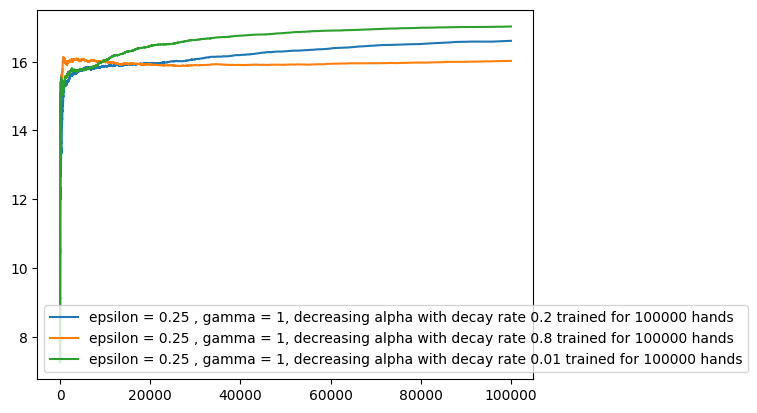

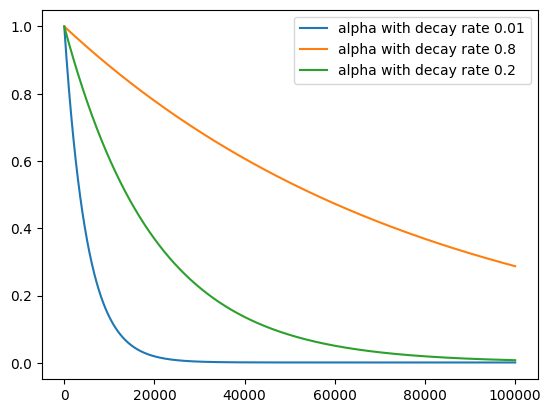

In [13]:
#plt.plot(averageValueOfHands_1, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.2 trained for 100000 hands')
# 



plt.plot(averageValueOfHands_2, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.2 trained for 100000 hands')
plt.plot(averageValueOfHands_3, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.8 trained for 100000 hands')
plt.plot(averageValueOfHands_4, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
# plt.plot(averageValueOfHands_5, label='decreasing alpha 50000 with decay rate 150')

plt.legend()

plt.show()

# plt.plot(averageValueOfHands_2, label='decreasing alpha 10000 with decay rate 5')
# plt.legend()

# plt.show()

# plt.plot(averageValueOfHands_3, label='decreasing alpha 50000 with decay rate 5')
# plt.legend()

# plt.show()


# plt.plot(averageValueOfHands_3, label='decreasing alpha 50000 with decay rate 5')
# plt.legend()

# plt.show()



# plt.plot(alpha_5)
plt.plot(alpha_4 ,label = 'alpha with decay rate 0.01')
# plt.plot(alpha_3)
# plt.plot(alpha_2)
plt.plot(alpha_3, label = 'alpha with decay rate 0.8')
plt.plot(alpha_2, label = 'alpha with decay rate 0.2')
plt.legend()
plt.show()